<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n250.csv',
 'data_add_delta_-1.2_n120.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,76.371465,-0.079284,216.338479,216.429946,-0.091466
1,0.0,1.0,57.329540,39.507566,24.860616,-0.247521,131.450202,131.686530,-0.236328
2,0.0,2.0,45.215694,88.427736,44.633052,-0.009402,188.267079,188.284422,-0.017342
3,0.0,3.0,69.375325,88.876246,36.273616,0.058854,204.584040,204.544740,0.039301
4,0.0,4.0,87.837297,74.451291,38.863401,0.070519,211.222508,211.174863,0.047645
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.270220,93.109099,67.062076,0.047650,265.489045,265.425648,0.063397
119996,999.0,116.0,70.569996,62.828016,42.130053,0.008497,185.536561,185.515286,0.021276
119997,999.0,117.0,33.053551,90.107839,55.336233,0.112791,188.610413,188.511526,0.098887
119998,999.0,118.0,97.123486,57.315162,35.571509,0.026685,200.036842,199.982435,0.054407


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,76.371465,-0.079284,216.338479,216.429946,-0.091466
1,0.0,1.0,57.329540,39.507566,24.860616,-0.247521,131.450202,131.686530,-0.236328
2,0.0,2.0,45.215694,88.427736,44.633052,-0.009402,188.267079,188.284422,-0.017342
3,0.0,3.0,69.375325,88.876246,36.273616,0.058854,204.584040,204.544740,0.039301
4,0.0,4.0,87.837297,74.451291,38.863401,0.070519,211.222508,211.174863,0.047645
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.270220,93.109099,67.062076,0.047650,265.489045,265.425648,0.063397
119996,999.0,116.0,70.569996,62.828016,42.130053,0.008497,185.536561,185.515286,0.021276
119997,999.0,117.0,33.053551,90.107839,55.336233,0.112791,188.610413,188.511526,0.098887
119998,999.0,118.0,97.123486,57.315162,35.571509,0.026685,200.036842,199.982435,0.054407


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  61.191777  76.371465  ...  216.338479  216.429946 -0.091466
      1.0    57.329540  39.507566  24.860616  ...  131.450202  131.686530 -0.236328
      2.0    45.215694  88.427736  44.633052  ...  188.267079  188.284422 -0.017342
      3.0    69.375325  88.876246  36.273616  ...  204.584040  204.544740  0.039301
      4.0    87.837297  74.451291  38.863401  ...  211.222508  211.174863  0.047645
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  95.270220  93.109099  67.062076  ...  265.489045  265.425648  0.063397
      116.0  70.569996  62.828016  42.130053  ...  185.536561  185.515286  0.021276
      117.0  33.053551  90.107839  55.336233  ...  188.610413  188.511526  0.098887
      118.0  97.123486  57.315162  35.571509  ...  200.036842  199.982435  0.054407
      119.0  54.147012  98.070851  99.182000  ...  261.286260  261.407008 -0.120748

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  61.191777  76.371465  ...  216.338479  216.429946 -0.091466
      1.0    57.329540  39.507566  24.860616  ...  131.450202  131.686530 -0.236328
      2.0    45.215694  88.427736  44.633052  ...  188.267079  188.284422 -0.017342
      3.0    69.375325  88.876246  36.273616  ...  204.584040  204.544740  0.039301
      4.0    87.837297  74.451291  38.863401  ...  211.222508  211.174863  0.047645
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  95.270220  93.109099  67.062076  ...  265.489045  265.425648  0.063397
      116.0  70.569996  62.828016  42.130053  ...  185.536561  185.515286  0.021276
      117.0  33.053551  90.107839  55.336233  ...  188.610413  188.511526  0.098887
      118.0  97.123486  57.315162  35.571509  ...  200.036842  199.982435  0.054407
      119.0  54.147012  98.070851  99.182000  ...  261.286260  261.407008 -0.120748

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,76.371465,-0.079284,216.338479,216.429946,-0.091466
1,0.0,1.0,57.329540,39.507566,24.860616,-0.247521,131.450202,131.686530,-0.236328
2,0.0,2.0,45.215694,88.427736,44.633052,-0.009402,188.267079,188.284422,-0.017342
3,0.0,3.0,69.375325,88.876246,36.273616,0.058854,204.584040,204.544740,0.039301
4,0.0,4.0,87.837297,74.451291,38.863401,0.070519,211.222508,211.174863,0.047645
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.270220,93.109099,67.062076,0.047650,265.489045,265.425648,0.063397
119996,999.0,116.0,70.569996,62.828016,42.130053,0.008497,185.536561,185.515286,0.021276
119997,999.0,117.0,33.053551,90.107839,55.336233,0.112791,188.610413,188.511526,0.098887
119998,999.0,118.0,97.123486,57.315162,35.571509,0.026685,200.036842,199.982435,0.054407


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  61.191777  76.371465  ...  216.338479  216.429946 -0.091466
      1.0    57.329540  39.507566  24.860616  ...  131.450202  131.686530 -0.236328
      2.0    45.215694  88.427736  44.633052  ...  188.267079  188.284422 -0.017342
      3.0    69.375325  88.876246  36.273616  ...  204.584040  204.544740  0.039301
      4.0    87.837297  74.451291  38.863401  ...  211.222508  211.174863  0.047645
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  95.270220  93.109099  67.062076  ...  265.489045  265.425648  0.063397
      116.0  70.569996  62.828016  42.130053  ...  185.536561  185.515286  0.021276
      117.0  33.053551  90.107839  55.336233  ...  188.610413  188.511526  0.098887
      118.0  97.123486  57.315162  35.571509  ...  200.036842  199.982435  0.054407
      119.0  54.147012  98.070851  99.182000  ...  261.286260  261.407008 -0.120748

[120000 rows x 7 columns]

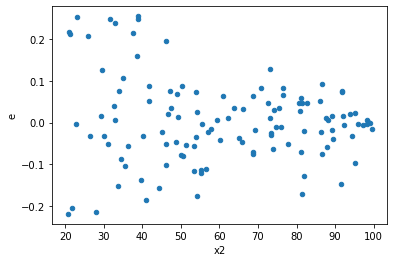

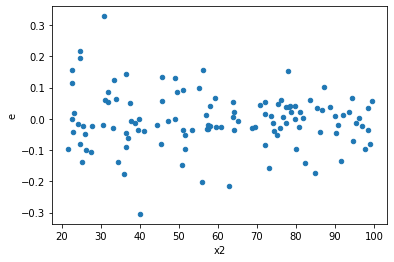

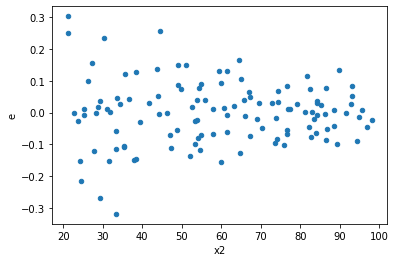

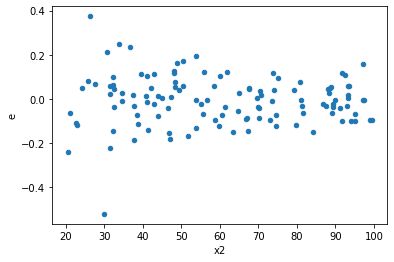

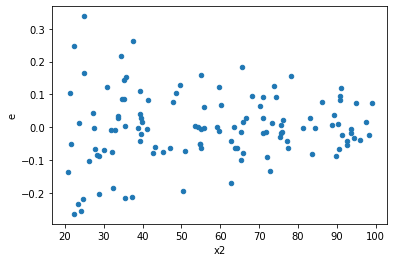

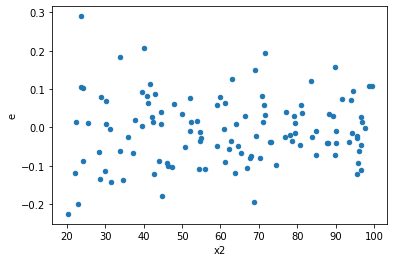

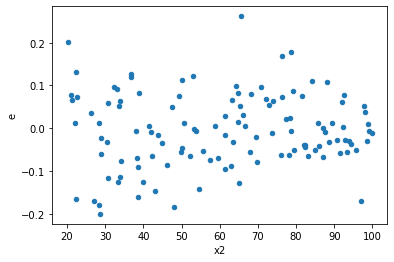

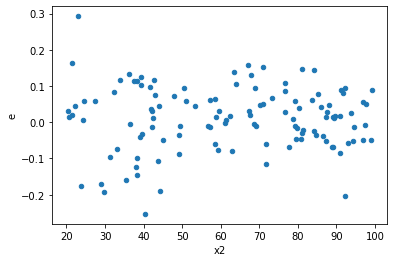

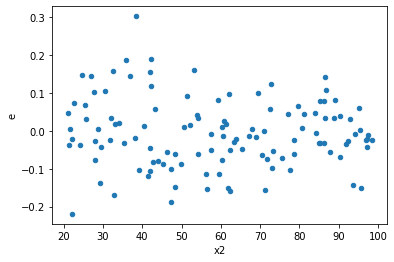

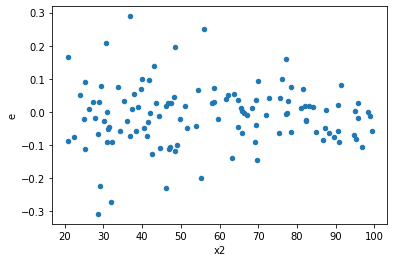

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.591068191812918,0.24575491549700534,0.013134848706953734,0.005461220344377896,0.415780985850767,0.003945860132340471,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.5769685494996605,0.31981662795588317,0.012821523322214676,0.007107036176797404,0.554305131940422,0.050681399623494265,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,0.7906764737908661,0.21460130265737662,0.017570588306463693,0.004768917836830592,0.2714148071568127,2.5565744980030654e-05,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.5540748265322857,0.21806027871259775,0.012312773922939682,0.0048457839713910615,0.39355745518586827,0.002235515853082381,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.6476549890616224,0.2747277450988107,0.014392333090258277,0.006105061002195793,0.42418841781310074,0.004823326664902063,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.5151486005987613,0.2570697111640512,0.011447746679972474,0.0057126602480900264,0.4990204979014929,0.0216787335787167,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.7635669339296974,0.2492459381597062,0.01696815408732661,0.005538798625771248,0.3264231687940727,0.0002688052148735914,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.515064838175056,0.22171063188602752,0.011445885292779023,0.004926902930800611,0.430451887711027,0.0055752712260808985,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.5040983214456821,0.19208164235708136,0.011202184921015159,0.0042684809412684745,0.3810400356149145,0.0015816664684081784,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    929
Reject005=1 : Homoscedasticity       71
Name: Result_test, dtype: int64